<a href="https://colab.research.google.com/github/Swikriti07/python-libraries-practice/blob/main/Worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1 - Implementation of Naive Bayes Algorithm
Question:
You are tasked with building a sentiment analysis model to classify movie reviews as positive or negative
using the IMDB Movie Review Dataset.
Part 1:
1. Load the dataset and preprocess the reviews.
a. Convert all text to lowercase.
b. Remove non-alphabetic characters (punctuation).
c. Tokenize the reviews and remove common stopwords.
d. Apply stemming to reduce words to their root form.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

df=pd.read_csv('/content/drive/MyDrive/DataSet/IMDB_Dataset.csv')
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['sentiment'] = df['sentiment'].str.lower().str.strip()
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df = df.dropna(subset=['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
def clean_text(text, remove_stopwords=True, use_stemming=False):
    """
    Clean and preprocess text data

    Parameters:
    text (str): Input text to clean
    remove_stopwords (bool): Whether to remove stopwords
    use_stemming (bool): Use stemming if True, lemmatization if False

    Returns:
    str: Cleaned text
    """
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize (split into words)
    words = text.split()

    # Remove stopwords if specified
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if w not in stop_words]

    # Apply stemming or lemmatization
    if use_stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(w) for w in words]
    else:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(w) for w in words]

    # Join back to string
    return ' '.join(words)

df['clean_review'] = df['review'].apply(clean_text)

#2. Split the dataset into training and testing sets (80% training, 20% testing).


In [ ]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.
a. Implement a Bag-of-Words model using CountVectorizer.
b. Train the Naive Bayes classifier using the training set.

In [ ]:
vectorizer = CountVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred = nb_model.predict(X_test_vec)
y_prob = nb_model.predict_proba(X_test_vec)[:, 1]



#Part 2:
1. Evaluate the performance of the model using the following metrics:
a. Accuracy
b. Precision, Recall, and F1-score
c. Confusion Matrix
d. ROC-AUC Score

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Probability scores for ROC-AUC
y_prob = nb_model.predict_proba(X_test_vec)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)



Accuracy: 0.8457

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4209  752]
 [ 791 4248]]
ROC-AUC Score: 0.9137616132565505



#2 Feature Selection Exercise.
2.1 Feature Selection using Wrapper Methods.
Dataset: Breast Cancer Prognostic Dataset
Objective
You are tasked with identifying the most important features in predicting breast cancer prognosis using the
Breast Cancer Prognostic Dataset from the UCI Machine Learning Repository. Apply a wrapper method
(Recursive Feature Elimination) to select the best features and evaluate your model’s performance.
Part 1: Data Loading and Preprocessing
1. Load the Breast Cancer Prognostic Dataset.
2. Dataset is available in Drive.
3. Perform basic exploratory data analysis (EDA) to understand the dataset:
• Summarize key statistics for each feature.
• Check for missing values and handle them appropriately.
4. Split the dataset into training (80%) and testing (20%) sets.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# EDA: Summary statistics
print(X.describe())

# Check for missing values
print("\nMissing values per column:")
print(X.isnull().sum())

#Training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

#Part 2: Apply a Wrapper Method
1. Use Recursive Feature Elimination (RFE) with a Logistic Regression model to perform feature selection:
• Select the top 5 features that contribute the most to predicting the target variable.
• Visualize the ranking of features.
2. Train the Logistic Regression model using only the selected features.


In [ ]:
# Base model
log_reg = LogisticRegression(max_iter=5000)

# Recursive Feature Elimination for top 5 features
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Top 5 Selected Features:", selected_features)

# Feature ranking (1 = selected)
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("\nFeature Ranking:")
print(feature_ranking)





Top 5 Selected Features: Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')

Feature Ranking:
mean radius                 1
texture error               1
worst compactness           1
worst radius                1
worst concavity             1
worst symmetry              2
mean concavity              3
worst concave points        4
mean compactness            5
worst smoothness            6
mean concave points         7
perimeter error             8
worst texture               9
mean symmetry              10
mean texture               11
mean smoothness            12
worst perimeter            13
area error                 14
worst fractal dimension    15
mean perimeter             16
radius error               17
compactness error          18
mean fractal dimension     19
concavity error            20
symmetry error             21
concave points error       22
smoothness error           23
mean area             

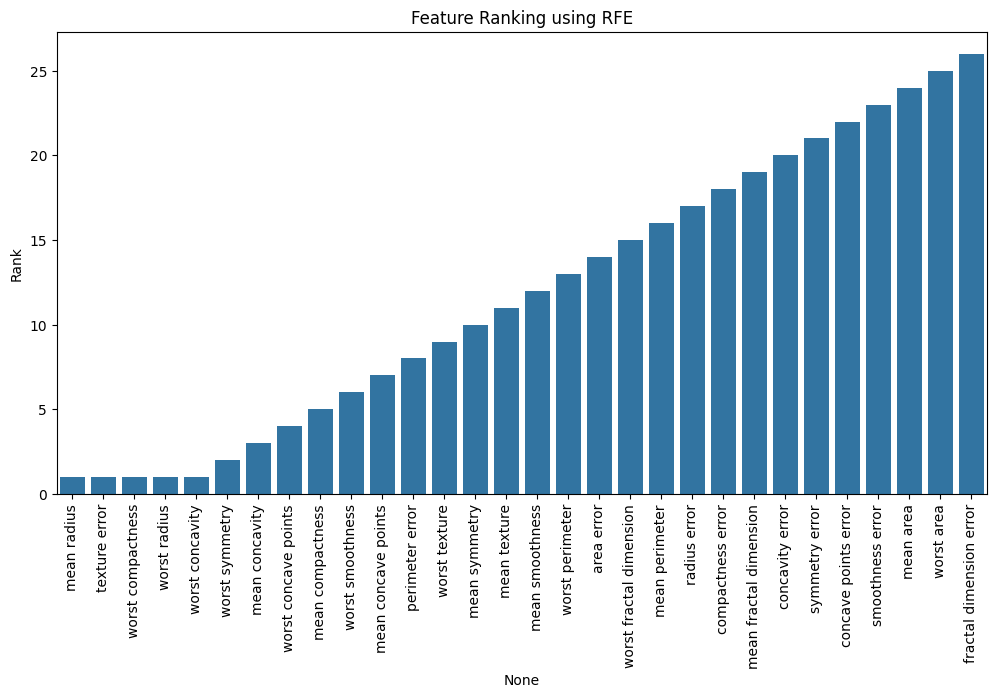

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=feature_ranking.index, y=feature_ranking.values)
plt.xticks(rotation=90)
plt.title("Feature Ranking using RFE")
plt.ylabel("Rank")
plt.show()

#Part 3: Model Evaluation
1. Evaluate the model’s performance using the testing set:
• Metrics to calculate: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
2. Compare the performance of the model trained on all features versus the model trained on the selected
features.


In [ ]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

log_reg.fit(X_train_sel, y_train)
y_pred_sel = log_reg.predict(X_test_sel)
y_prob_sel = log_reg.predict_proba(X_test_sel)[:, 1]


In [ ]:
def evaluate_model(y_true, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

print("=== Model Performance using Top 5 Features ===")
evaluate_model(y_test, y_pred_sel, y_prob_sel)


=== Model Performance using Top 5 Features ===
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-Score: 0.9790209790209791
ROC-AUC: 0.9983622666229938

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [ ]:
log_reg_full = LogisticRegression(max_iter=5000)
log_reg_full.fit(X_train, y_train)
y_pred_full = log_reg_full.predict(X_test)
y_prob_full = log_reg_full.predict_proba(X_test)[:,1]

print(" Model Performance using All Features")
evaluate_model(y_test, y_pred_full, y_prob_full)


 Model Performance using All Features
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1-Score: 0.9655172413793104
ROC-AUC: 0.9977071732721913

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[39  4]
 [ 1 70]]


#Part 4: Experiment
1. Experiment with different numbers of selected features (e.g., top 3, top 7).
2. Discuss how feature selection affects model performance.

In [ ]:
rfe_3 = RFE(estimator=log_reg, n_features_to_select=3)
rfe_3.fit(X_train, y_train)

selected_3 = X.columns[rfe_3.support_]
print("Top 3 Selected Features:", selected_3)


Top 3 Selected Features: Index(['texture error', 'worst compactness', 'worst concavity'], dtype='object')


In [ ]:
rfe_7 = RFE(estimator=log_reg, n_features_to_select=7)
rfe_7.fit(X_train, y_train)

selected_7 = X.columns[rfe_7.support_]
print("Top 7 Selected Features:", selected_7)


Top 7 Selected Features: Index(['mean radius', 'mean concavity', 'texture error', 'worst radius',
       'worst compactness', 'worst concavity', 'worst symmetry'],
      dtype='object')
